In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')


In [2]:
print("recovered shape : ",recovered.shape)
print("confirmed shape : ",confirmed.shape)
print("deaths shape: ",deaths.shape)
print('Colunas: ',recovered.columns)

recovered shape :  (442, 57)
confirmed shape :  (442, 57)
deaths shape:  (442, 57)
Colunas:  Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20'],
      dtype='object')


In [0]:
time_recovered = recovered.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
time_confirmed = confirmed.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
time_deaths = deaths.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
sum_recovered = time_recovered.sum()
sum_confirmed = time_confirmed.sum()
sum_deaths = time_deaths.sum()

In [0]:
sum_confirmed = sum_confirmed.to_frame()
sum_deaths = sum_deaths.to_frame()
sum_recovered = sum_recovered.to_frame()

In [0]:
sum_confirmed.columns = ['sum_confirmed']
sum_deaths.columns = ['sum_deaths']
sum_recovered.columns = ['sum_recovered']
covid_19 = sum_confirmed

In [0]:
covid_19['sum_recovered'] = sum_recovered['sum_recovered']
covid_19['sum_deaths'] = sum_deaths['sum_deaths']


In [0]:
covid_19['date'] = covid_19.index
covid_19.index =  np.arange(1, len(covid_19)+1)

In [8]:
covid_19 = covid_19.loc[:,::-1]
covid_19.head()

,date,sum_deaths,sum_recovered,sum_confirmed
1,1/22/20,17,28,555
2,1/23/20,18,30,653
3,1/24/20,26,36,941
4,1/25/20,42,39,1434
5,1/26/20,56,52,2118


In [0]:
covid_19['actives'] = covid_19['sum_confirmed'] - covid_19['sum_deaths'] - covid_19['sum_recovered']

In [10]:
covid_19.tail(3)

,date,sum_deaths,sum_recovered,sum_confirmed,actives
51,3/12/20,4720,68324,128343,55299
52,3/13/20,5404,70251,145193,69538
53,3/14/20,5819,72624,156102,77659


In [0]:
#confirmed
confirmed_china = confirmed[confirmed['Country/Region']=="China"].sum()
china_confirmed = confirmed_china.to_frame()
#recovered
recovered_china = recovered[recovered['Country/Region']=="China"].sum()
china_recovered = recovered_china.to_frame()
#deaths
deaths_china = deaths[deaths['Country/Region']=="China"].sum()
china_deaths = deaths_china.to_frame()

In [0]:
china_confirmed = china_confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=0)
china_recovered = china_recovered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=0)
china_deaths = china_deaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=0)

In [13]:
china_confirmed.tail()

,0
3/10/20,80887
3/11/20,80921
3/12/20,80932
3/13/20,80945
3/14/20,80977


In [0]:
#verificando os dados por país
group_confirmed = confirmed.groupby(['Country/Region']).sum()
group_recovered = recovered.groupby(['Country/Region']).sum()
group_deaths = deaths.groupby(['Country/Region']).sum()
#agrupado.describe()

In [0]:
#Resto do mundo:
group_confirmed = group_confirmed.drop(['China'], axis=0)
group_recovered = group_recovered.drop(['China'], axis=0)
group_deaths = group_deaths.drop(['China'], axis=0)

In [0]:
group_confirmed = group_confirmed.drop(columns=['Lat', 'Long'])
group_recovered = group_recovered.drop(columns=['Lat', 'Long'])
group_deaths = group_deaths.drop(columns=['Lat', 'Long'])
rw_recovered = group_recovered.sum()
rw_confirmed = group_confirmed.sum()
rw_deaths = group_deaths.sum()

In [0]:
#No pior cenario - Italy
#confirmed
confirmed_italy = confirmed[confirmed['Country/Region']=="Italy"].sum()
italy_confirmed = confirmed_italy.to_frame()
#recovered
recovered_italy = recovered[recovered['Country/Region']=="Italy"].sum()
italy_recovered = recovered_italy.to_frame()
#deaths
deaths_italy = deaths[deaths['Country/Region']=="Italy"].sum()
italy_deaths = deaths_italy.to_frame()

In [0]:
italy_confirmed = italy_confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=0)
italy_recovered = italy_recovered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=0)
italy_deaths = italy_deaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=0)

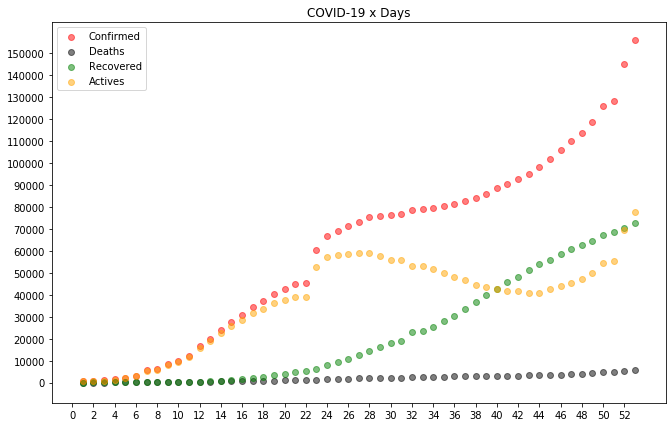

In [19]:
x = covid_19.index
y1 = covid_19['sum_confirmed']
y2 = covid_19['sum_deaths']
y3 = covid_19['sum_recovered']
y4 = covid_19['actives']

plt.rcParams['figure.figsize'] = (11,7)
plt.scatter(x,y1, color='red',alpha=0.5, label = 'Confirmed')
plt.scatter(x,y2, color = 'black', alpha=0.5, label = 'Deaths')
plt.scatter(x,y3, color = 'green', alpha=0.5, label = 'Recovered')
plt.scatter(x,y4, color = 'orange', alpha=0.5, label = 'Actives')

plt.legend( loc='upper left');
plt.title('COVID-19 x Days');

plt.yticks(np.arange(0, 150001, 10000));
plt.xticks(np.arange(0,len(x)+1,2))
plt.show()

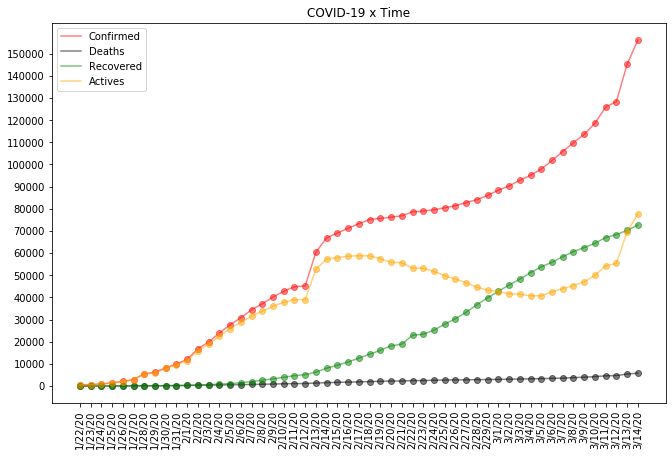

In [20]:
x1 = covid_19['date']


plt.plot(x1,y1, color= 'red', alpha=0.5, label = 'Confirmed')
plt.plot(x1,y1, 'ro', color= 'red',alpha =0.5)
plt.plot(x1,y2, color = 'black', alpha=0.5, label = 'Deaths')
plt.plot(x1,y2,'ro', color = 'black', alpha=0.5)
plt.plot(x1,y3, color = 'green', alpha=0.5, label = 'Recovered')
plt.plot(x1,y3,'ro', color = 'green', alpha=0.5)
plt.plot(x1,y4, color = 'orange', alpha=0.5, label = 'Actives')
plt.plot(x1,y4, 'ro', color = 'orange', alpha=0.5)


plt.legend();
plt.title('COVID-19 x Time');

plt.xticks(rotation= 90);
plt.yticks(np.arange(0, 150001, 10000));
plt.show()

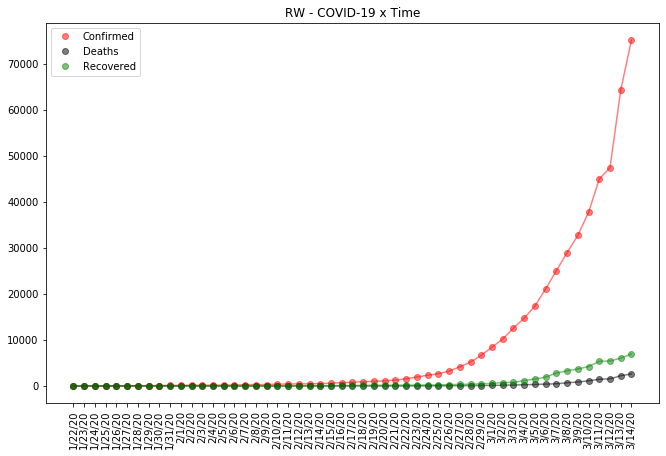

In [21]:
plt.plot(rw_confirmed, 'ro', color= 'red', alpha=0.5, label = 'Confirmed')
plt.plot(rw_confirmed, color= 'red', alpha=0.5)
plt.plot(rw_deaths, 'ro', color= 'black', alpha=0.5, label = 'Deaths')
plt.plot(rw_deaths, color= 'black', alpha=0.5)
plt.plot(rw_recovered, 'ro', color= 'green', alpha=0.5, label = 'Recovered')
plt.plot(rw_recovered, color= 'green', alpha=0.5)

plt.legend();
plt.title('RW - COVID-19 x Time');

plt.xticks(rotation= 90);
plt.show()

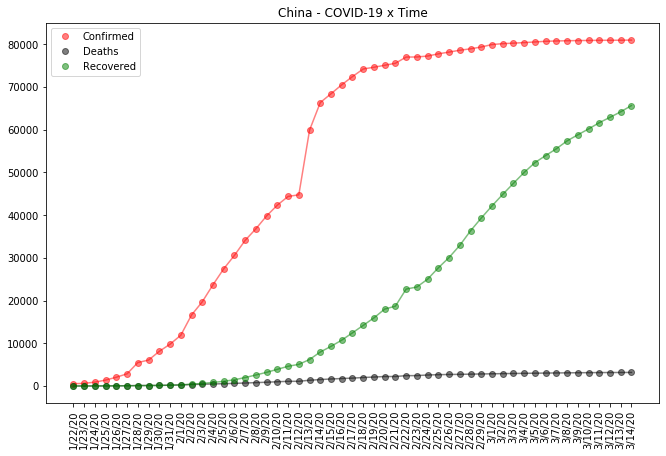

In [22]:
plt.plot(china_confirmed, 'ro', color= 'red', alpha=0.5, label = 'Confirmed')
plt.plot(china_confirmed, color= 'red', alpha=0.5)
plt.plot(china_deaths,'ro', color= 'black', alpha=0.5, label = 'Deaths')
plt.plot(china_deaths, color= 'black', alpha=0.5)
plt.plot(china_recovered, 'ro', color= 'green', alpha=0.5, label = 'Recovered')
plt.plot(china_recovered, color= 'green', alpha=0.5)

plt.legend();
plt.title('China - COVID-19 x Time');

plt.xticks(rotation= 90);
plt.show()

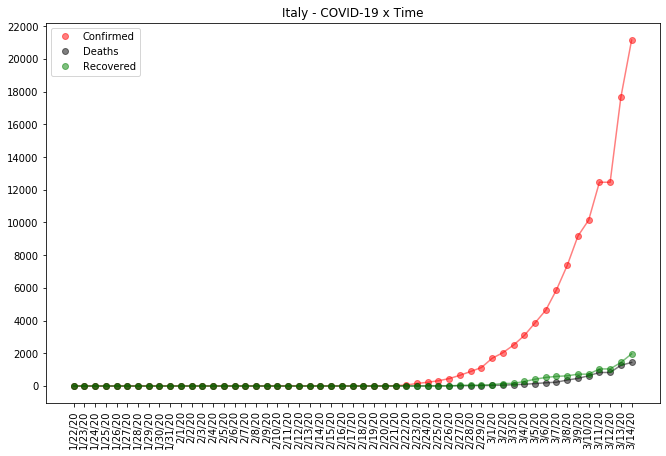

In [26]:
plt.plot(italy_confirmed, 'ro', color= 'red', alpha=0.5, label = 'Confirmed')
plt.plot(italy_confirmed, color= 'red', alpha=0.5)
plt.plot(italy_deaths,'ro', color= 'black', alpha=0.5, label = 'Deaths')
plt.plot(italy_deaths, color= 'black', alpha=0.5)
plt.plot(italy_recovered, 'ro', color= 'green', alpha=0.5, label = 'Recovered')
plt.plot(italy_recovered, color= 'green', alpha=0.5)

plt.legend();
plt.title('Italy - COVID-19 x Time');

plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 22001, 2000));
plt.show()